In [1]:
import json

In [2]:
# twitterscraper "#msft OR #microsoft  OR #windows OR #azure OR #xbox lang:en filter:verified" -bd 2019-01-01 -p 50 -o tweets_msft.json -ow
with open('tweets_BA18-19.json', 'r') as f:
    tweets = json.load(f, encoding = 'utf-8')

In [3]:
print(len(tweets))
print(len(tweets[0]))
print(tweets[0].keys())

6264
10
dict_keys(['fullname', 'html', 'id', 'likes', 'replies', 'retweets', 'text', 'timestamp', 'url', 'user'])


In [4]:
[tweet.pop('fullname') for tweet in tweets]
[tweet.pop('html') for tweet in tweets]
[tweet.pop('id') for tweet in tweets]
[tweet.pop('likes') for tweet in tweets]
[tweet.pop('replies') for tweet in tweets]
[tweet.pop('retweets') for tweet in tweets]
[tweet.pop('url') for tweet in tweets]
[tweet.pop('user') for tweet in tweets]

['BoeingAirplanes',
 'modhop',
 'DailyNewsEgypt',
 'BoeingAirplanes',
 'BoeingEurope',
 'BoeingEurope',
 'Boeing_In',
 'BoeingUK',
 'BoeingUK',
 'BoeingEurope',
 'BoeingCEO',
 'BoeingDefense',
 'dcatchpole',
 'BoeingEurope',
 'BoeingEurope',
 'Boeing_In',
 'BoeingAirplanes',
 'thelibragroup',
 'StratAero',
 'BoeingEurope',
 'BoeingAirplanes',
 'modhop',
 'DailyNewsEgypt',
 'BoeingAirplanes',
 'BoeingEurope',
 'BoeingEurope',
 'Boeing_In',
 'BoeingUK',
 'BoeingUK',
 'BoeingEurope',
 'BoeingCEO',
 'BoeingDefense',
 'dcatchpole',
 'BoeingEurope',
 'BoeingEurope',
 'Boeing_In',
 'BoeingAirplanes',
 'thelibragroup',
 'StratAero',
 'BoeingEurope',
 'BoeingAustralia',
 'BoeingDefense',
 'BoeingDefense',
 'BoeingEurope',
 'BoeingMidEast',
 'BoeingDefense',
 'BoeingAustralia',
 'waltgov',
 'BoeingAustralia',
 'HSajwanization',
 'AOPA',
 'BremontMilitary',
 'mnaEN',
 'jonostrower',
 'RT_com',
 'BenjaminPZhang',
 'BoeingAirplanes',
 'BoeingDefense',
 'weareboeingsc',
 'FlyRwandAir',
 'BremontMili

In [5]:
print(tweets[0])

{'text': 'The first fully-assembled #777X static test airplane rolled out of our facility in Everett overnight. This non-flying airplane now heads off to nearly a year of testing to verify design strength. #Boeing pic.twitter.com/UovuvHQTWz', 'timestamp': '2018-09-08T17:11:28'}


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [7]:
#tweet = tweets[0]
#print(tweet)
#temp = analyzer.polarity_scores(tweet.pop('text'))
#temp_tweet['vader'] = temp.pop('compound')
for tweet in tweets:
    tweet['vader'] = (analyzer.polarity_scores(tweet.get('text'))).pop('compound')

In [8]:
print(tweets[0])

{'text': 'The first fully-assembled #777X static test airplane rolled out of our facility in Everett overnight. This non-flying airplane now heads off to nearly a year of testing to verify design strength. #Boeing pic.twitter.com/UovuvHQTWz', 'timestamp': '2018-09-08T17:11:28', 'vader': 0.4939}


In [9]:
import numpy as np
import datetime

%matplotlib inline
import matplotlib as plt

vaderScores = np.empty([len(tweets)])
timeStamps = np.empty([len(tweets)], dtype = datetime.datetime)
for i in range(len(tweets)):
    vaderScores[i] = tweets[i].get('vader')
    timeStamps[i] = datetime.datetime.strptime(tweets[i].get('timestamp'), '%Y-%m-%dT%H:%M:%S')
print('Mean: ' + str(np.mean(vaderScores)))
print('Standard deviation: ' + str(np.std(vaderScores)))

Mean: 0.10033552043422732
Standard deviation: 0.4460609199911414


(6264, 2)
2019-07-13 10:26:39
384


C:\Users\patel\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


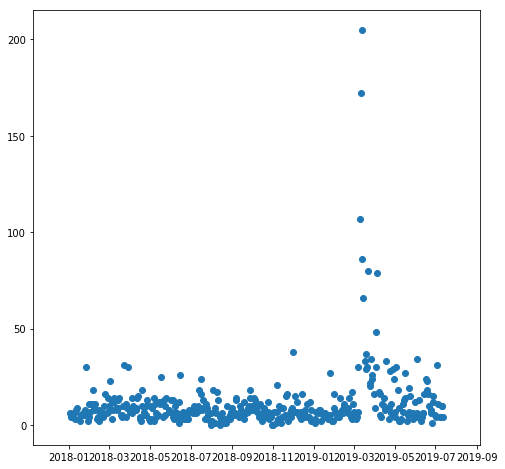

In [10]:
import pandas as pd

denoisedVader = vaderScores[vaderScores != 0]
vader_times = np.transpose(np.vstack((timeStamps, vaderScores)))
vader_times_Size = vader_times.shape
print(vader_times_Size)
df = pd.DataFrame(vader_times, columns=['date', 'vader'])
df.sort_values(by=['date'], ascending = True, inplace = True)

print(df.values[len(timeStamps)-1, 0])
minTime = df.values[0, 0]
maxTime = df.values[len(timeStamps)-1, 0]

daysIncluded = np.busday_count(minTime.strftime('%Y-%m-%d'), maxTime.strftime('%Y-%m-%d'), holidays = 
                     ['2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
                      '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
                      '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04'])
calendar = np.busdaycalendar(holidays = 
                     ['2018-01-01', '2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28', '2018-07-04',
                      '2018-09-03', '2018-11-22', '2018-12-05', '2018-12-25',
                      '2019-01-01', '2019-01-21', '2019-02-18', '2019-04-19', '2019-05-27', '2019-07-04'])
print(daysIncluded)

NUM_SAMPLES = len(timeStamps)

mean_impute = np.mean(denoisedVader)
std_impute = np.std(denoisedVader)

dates = np.arange(np.datetime64(minTime.strftime('%Y-%m-%d')), np.datetime64(maxTime.strftime('%Y-%m-%d')))
dates = dates[np.is_busday(dates, busdaycal = calendar)]

std_arr = np.empty(daysIncluded)
mean_arr = np.empty(daysIncluded)
vol_arr = np.empty(daysIncluded)
std_exists = np.empty(daysIncluded)
mean_exists = np.empty(daysIncluded)

imported_dates = np.empty(NUM_SAMPLES, dtype = 'datetime64[D]')
for d in range(NUM_SAMPLES):
    tempDate = np.datetime64(df.values[d, 0].strftime('%Y-%m-%d'))
    imported_dates[d] = tempDate

for i in range(daysIncluded):
    if i == daysIncluded-1:
        idx = (imported_dates == dates[i])
        tempVader = df.values[idx, 1]
    else:
        idx = np.where((imported_dates >= dates[i]) & (imported_dates < dates[i+1]))
        tempVader = df.values[idx, 1]
    if tempVader.size == 0:
        std_arr[i] = std_impute
        mean_arr[i] = mean_impute
        vol_arr[i] = 0
        std_exists[i] = 0
        mean_exists[i] = 0
    else:
        tempVader = tempVader[tempVader != 0]
        if tempVader.size == 0:
            std_arr[i] = std_impute
            mean_arr[i] = mean_impute
            vol_arr[i] = 0
            std_exists[i] = 0
            mean_exists[i] = 0
        else:
            std_arr[i] = np.std(tempVader)
            mean_arr[i] = np.mean(tempVader)
            vol_arr[i] = tempVader.size
            std_exists[i] = 1
            mean_exists[i] = 1
    
plt.pyplot.figure(figsize=(8, 8))
plt.pyplot.scatter(dates, vol_arr)

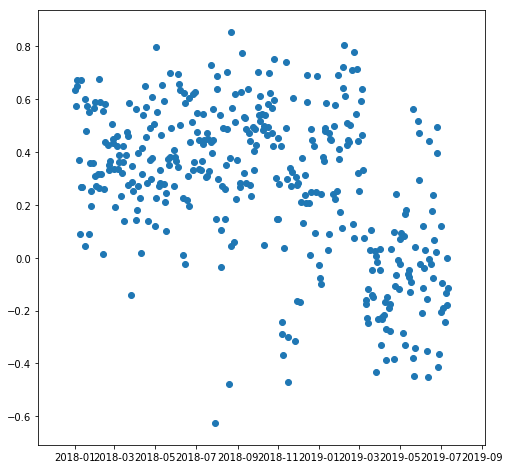

In [13]:
plt.pyplot.figure(figsize=(8, 8))
plt.pyplot.scatter(dates, mean_arr)

In [11]:
output_df = pd.DataFrame({'dates':dates, 'vader_mean':mean_arr, 'vader_std':std_arr, 
                         'volume':vol_arr, 'mean_exist':mean_exists, 'std_exist':std_exists})
print(output_df)

         dates  vader_mean  vader_std  volume  mean_exist  std_exist
0   2018-01-02    0.633883   0.193519     6.0         1.0        1.0
1   2018-01-03    0.573825   0.230146     4.0         1.0        1.0
2   2018-01-04    0.652100   0.211064     5.0         1.0        1.0
3   2018-01-05    0.671750   0.169729     4.0         1.0        1.0
4   2018-01-08    0.371183   0.542615     6.0         1.0        1.0
5   2018-01-09    0.089767   0.293686     3.0         1.0        1.0
6   2018-01-10    0.267486   0.286967     7.0         1.0        1.0
7   2018-01-11    0.671838   0.238761     8.0         1.0        1.0
8   2018-01-12    0.267300   0.302769     9.0         1.0        1.0
9   2018-01-16    0.599400   0.165331     3.0         1.0        1.0
10  2018-01-17    0.043000   0.337200     2.0         1.0        1.0
11  2018-01-18    0.480700   0.139971     5.0         1.0        1.0
12  2018-01-19    0.573640   0.172192     5.0         1.0        1.0
13  2018-01-22    0.090717   0.453

In [12]:
output_df.to_json('tweets_BA18-19_mod.json', orient='split')